# Algorithm

Now, let’s go through this step-by-step, as if we were clustering a simple set of points.

1. **Select the Number of Clusters (K)**: Let’s say you want to create 3 clusters ( $K=3$ ).

2. **Initialize Centroids**: Randomly select 3 points from your dataset as the initial centroids.

3. **Assign Data Points to Nearest Centroid**:
* Calculate the distance from each data point to all centroids.
* Assign each data point to the nearest centroid.
* Now you have 3 clusters of data points.

4. **Update Centroids**:
* For each cluster, calculate the mean position of all data points in that cluster.
* Move the centroid to this new mean position.

5. **Repeat Until Convergence**:
* Reassign all data points to the nearest centroid based on the updated centroids.
* Update the centroids again.
* Repeat this process until the centroids don’t change much between iterations.

## Example
Here’s a simple example to illustrate:

Imagine you have data points representing the locations of several coffee shops in a city. You want to group them into 3 clusters to find central locations for potential delivery hubs.

1. **Select** $K=3$ and randomly pick $3$ initial locations as centroids.
2. **Assign each coffee shop to the nearest centroid**. Now you have 3 groups.
3. **Calculate the mean location for each group** and move the centroids to these new locations.
4. **Reassign the coffee shops to the nearest new centroid** and update the centroids again.
5. **Continue this process** until the centroids stabilize (stay the same).

By the end, you’ll have 3 clusters of coffee shops, each with a central hub location that minimizes the distance to the shops in its cluster.

# Choosing the Right Number of Clusters

Choosing the right number of clusters is crucial for effective K-Means Clustering. 

## 1. The Elbow Method
One popular method to determine this is the Elbow Method. Let’s walk through what it is and how you can use it.

The Elbow Method involves running the K-Means algorithm for a range of cluster numbers (say, $1$ to $10$) and computing the sum of squared distances from each point to its assigned centroid (known as inertia). As you increase the number of clusters, the inertia decreases because the clusters are smaller and tighter. However, there’s a point where the **rate of decrease sharply changes**, forming an “elbow” in the graph. This point typically represents a good balance between cluster accuracy and computational efficiency.

#### Practical Example with a Dataset
Let’s say you have a dataset of 20 coffeshop locations (X, Y coordinates).

1. **Run K-Means for different values of $K$ (e.g., 1 to 10).**
2. **Plot the inertia for each value of $K$.**
3. **Look for the “elbow” in the plot.** The value of $K$ at this point is your ideal number of clusters.

Here’s how you can implement this in Python:

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Required for the elbow method
from sklearn.cluster import KMeans

# Required for the silhouette score
from sklearn.metrics import silhouette_score

# Required for the k-means implementation
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Required for visualizing the clusters
import seaborn as sns

In [74]:
# Generate a random dataset of coffeeshop locations
data = np.random.rand(20, 2)

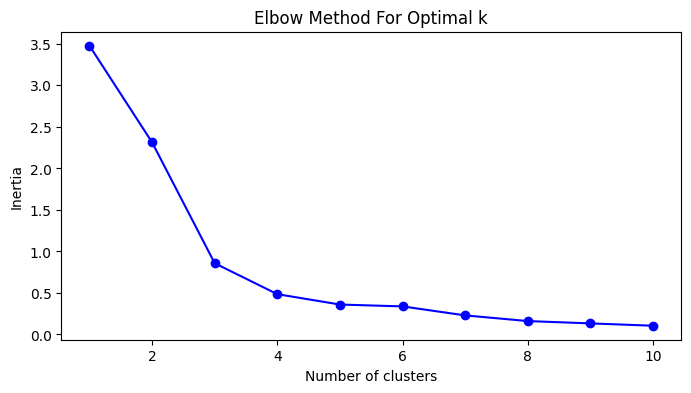

In [75]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on the Elbow Method $4$ looks the optimal $k$ number of clusters in this particular use case.

## 2. Silhouette Score

Another method to determine the number of clusters is the Silhouette Score. This method measures how similar a data point is to its own cluster compared to other clusters.

#### Explanation and Usage
The Silhouette Score ranges from -1 to 1. A higher score indicates that the data points are well-clustered. A score close to 1 means the points are appropriately clustered, a score around 0 indicates overlapping clusters, and a score less than 0 means the points are likely assigned to the wrong cluster.

#### Practical Example
Using the same coffeeshop dataset, you can calculate the Silhouette Score for different values of $K$ and choose the one with the highest score.

Here’s a Python implementation:

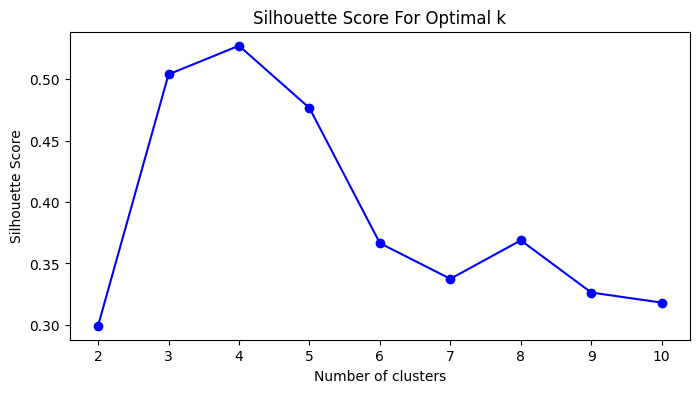

In [76]:
silhouette_scores = []

K = range(2, 11) # silhouette_score requires more than 1 cluster labels.
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

Based on the Silhouette Score $4$ again looks the optimal $k$ number of clusters (i.e. the Silhouette Score is highest for $k=4$).

# Implementation

#### Setting Up Your Environment
Before you start coding, you need to install the necessary libraries.

```pip install numpy pandas matplotlib seaborn scikit-learn```

#### Data Preparation

##### Importing and Cleaning Your Data
First, you need to import your data. Let’s reuse the `mercedes_c220.csv` data file, used in another article.

In [78]:
# Load the dataset
data = pd.read_csv('data/mercedes_c220.csv')

# Inspect the first few rows
print(data.head())

   years      km   hp  transmission  price
0     18  185000  150             2    500
1     23  281397  143             1    750
2     29  300000   95             1    850
3     25  383873  125             2    950
4     20  373000  150             1   1112


##### Feature Selection and Scaling
Select relevant features for clustering and scale them. Scaling ensures that each feature contributes equally to the **distance** calculations.

In [81]:
# Select features
features = data[['years', 'km', 'hp', 'price']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print(scaled_features)

[[ 0.59121733 -0.60581186 -0.85622652 -1.05950079]
 [ 1.49352904  0.80756905 -1.2509915  -1.03080294]
 [ 2.5763031   1.0803278  -3.9579514  -1.0193238 ]
 ...
 [-2.11571782 -3.06024472  1.96352337  5.42609769]
 [-1.93525548 -3.19366968  1.96352337  5.78137702]
 [-2.47664251 -3.03825159  1.79433838  6.03770619]]


#### Pick K - number of clusters

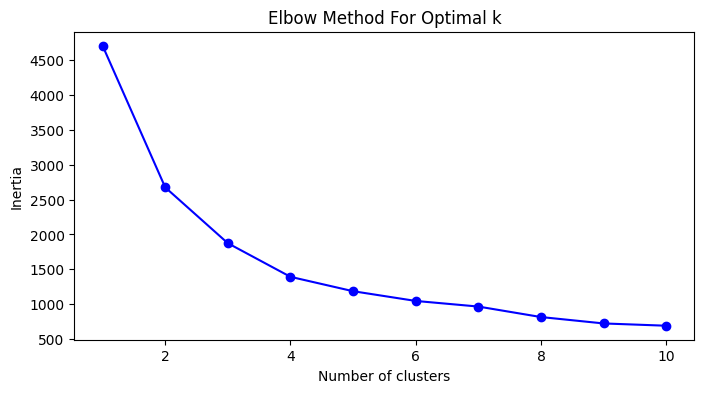

In [82]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Something between 3 and 4 looks like a proper value, but since it is not conclusive, let's run the silhouette score as well.

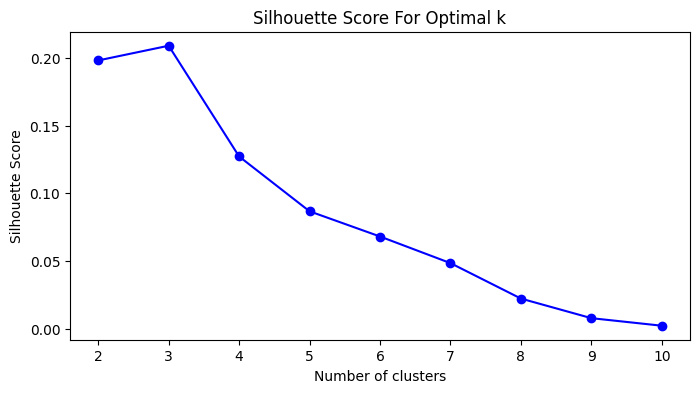

In [83]:
silhouette_scores = []

K = range(2, 11) # silhouette_score requires more than 1 cluster labels.
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

$3$ has the highest best score (although 0.20 in general is pretty low silhoutte score, which means the list of mercedes cars is not very appropriate for clustering.

### Coding the K-Means Algorithm
Now, let’s implement the K-Means algorithm using the scaled features.)

In [84]:

# Set the number of clusters
k = 3

# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
data['cluster'] = labels

print(data.head())

   years      km   hp  transmission  price  cluster
0     18  185000  150             2    500        0
1     23  281397  143             1    750        0
2     29  300000   95             1    850        0
3     25  383873  125             2    950        0
4     20  373000  150             1   1112        0


### Visualizing the Clusters

Finally, visualize the clusters to understand the results better. You can use Matplotlib and Seaborn for this purpose.

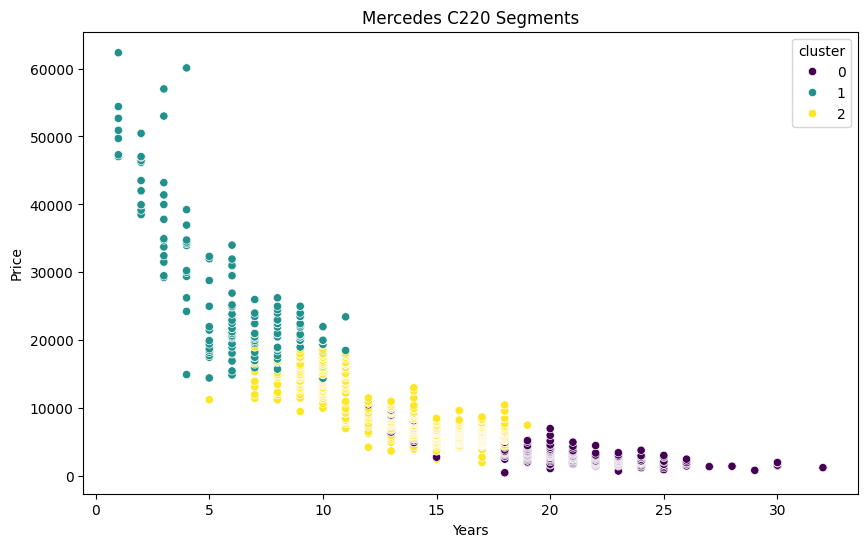

In [87]:
# Create a scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='years', y='price', hue='cluster', palette='viridis')
plt.title('Mercedes C220 Segments')
plt.xlabel('Years')
plt.ylabel('Price')
plt.show()

This visualization will help you see how the data points are grouped and if the clusters make sense.

# References
* [K-Means Clustering for Dummies: A Beginner’s Guide](https://medium.com/@amit25173/k-means-clustering-for-dummies-a-beginners-guide-399fb8c427fd)